# 拉钩网数据分析岗位数据分析

# 项目介绍

1、项目介绍：
既然想从事这个行业，首先要对这个行业有所了解，最直接、最真实的方式就是从企业那里获得需求讯息，这样才最能够指导自己的学习方向和简历准备。本次项目用scrapy框架爬取拉勾网数据分析的岗位的基本信息，利用pandas，matplotlib,seaborn等对数据进行可视化分析，探索该岗位地域分布特点，不同城市薪资情况等。

2、特征意义
   - 岗位名称：positionName
   - 月    薪：month_salary     
   - 公司名称：companyName
   - 所属行业：companyFiled
   - 公司规模: companySize
   - 所在城市: city
   - 经验要求: experience
   - 学历要求: qualification
   - 全职/兼职:full_or_parttime 
   - 详情描述: detaLink

3、目的：
   - 数据分析师岗位需求的地域性分布；
   - 整个群体中薪酬分布的情况；
   - 不同城市数据分析师的薪酬情况是怎样的；
   - 该岗位对于工作经验的要求是怎样的；
   - 根据工作经验的不同，薪酬是怎样变化的；
   - 学历对薪酬有什么影响吗

# 数据探索

In [28]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif']=['SimHei']
data_lagou=pd.read_csv('E:/data_lagou.csv')
print(data_lagou.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 10 columns):
city                420 non-null object
companyField        420 non-null object
companyName         420 non-null object
companySize         420 non-null object
detailLink          420 non-null object
experience          420 non-null object
full_or_parttime    420 non-null object
month_salary        420 non-null object
positionName        420 non-null object
qualification       420 non-null object
dtypes: object(10)
memory usage: 32.9+ KB
None


可以看到总共435条数据，数据很完整，没有缺失值，这对后面的分析来说是个好消息

# 数据分析

地域性分析

In [59]:
#观察地域分布情况
count_by_city=data_lagou.groupby('city').size().sort_values(ascending=False)
print(count_by_city)

city
北京     224
上海      64
杭州      28
深圳      26
广州      17
南京      10
武汉      10
苏州       7
成都       5
长沙       4
郑州       3
天津       3
合肥       2
泉州       2
海口       2
珠海       2
河源       1
湛江       1
漳州       1
烟台       1
宁波       1
大连       1
石家庄      1
厦门       1
西安       1
重庆       1
青岛       1
dtype: int64


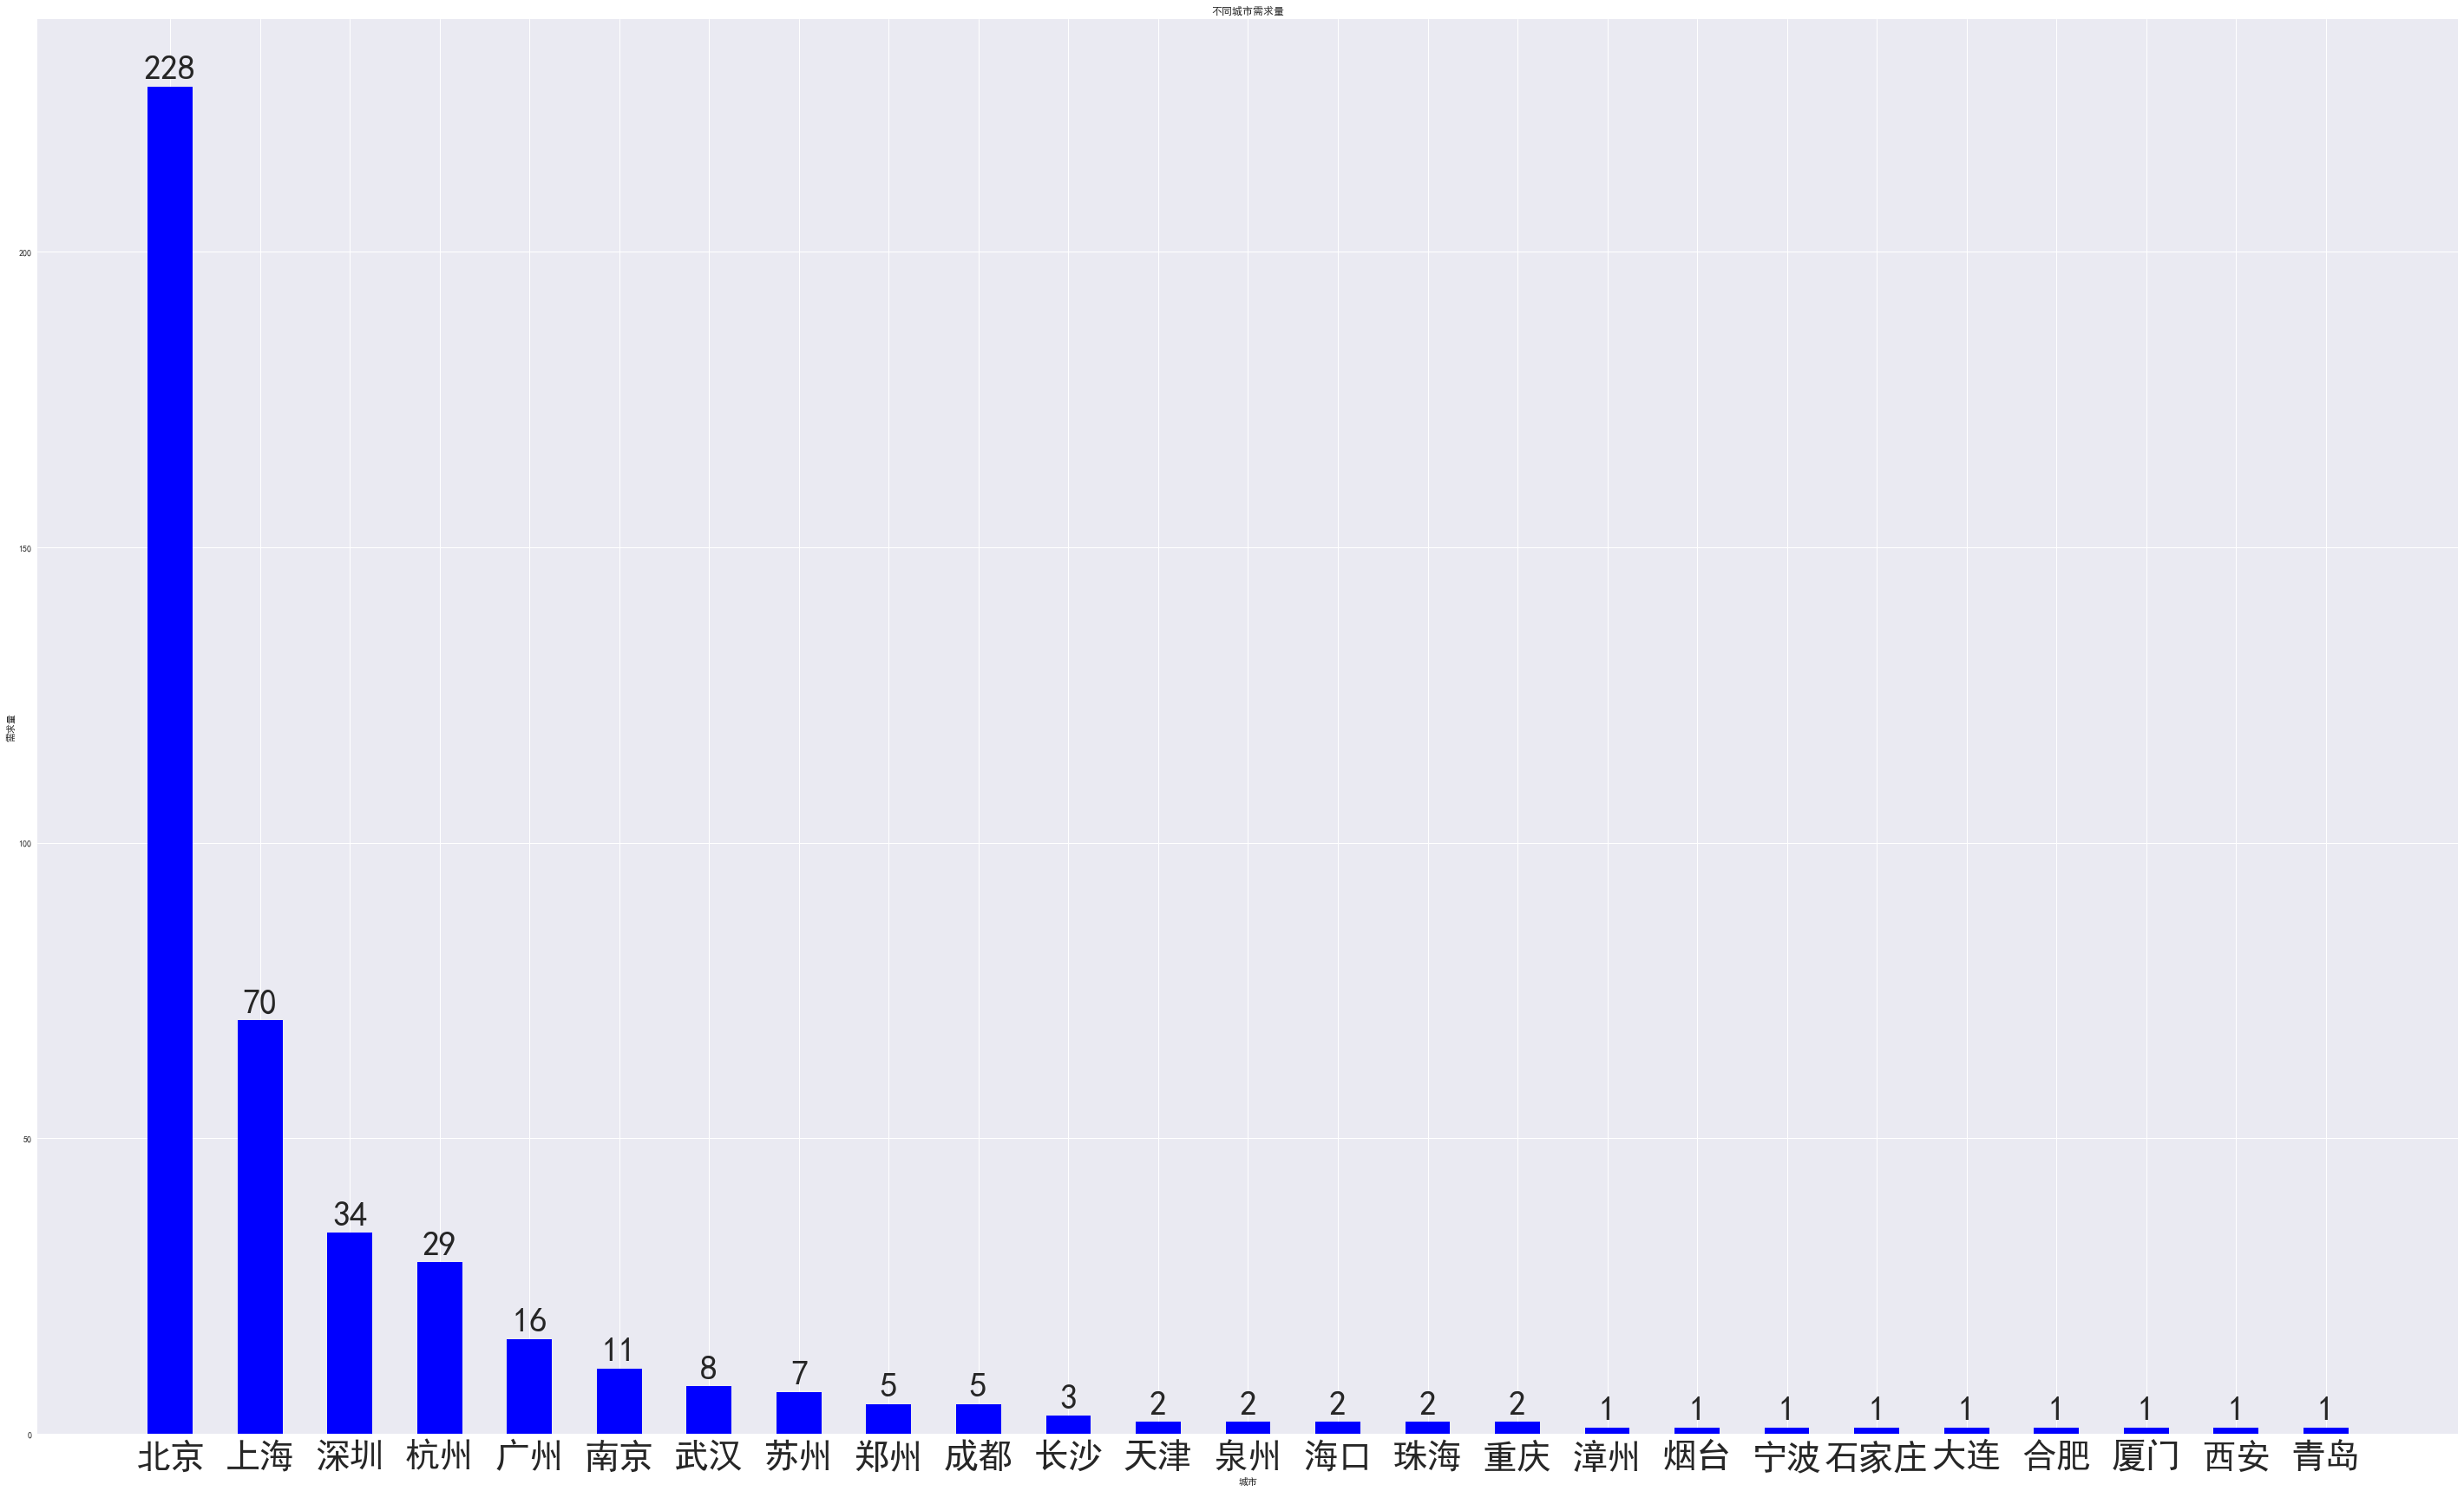

In [50]:
import matplotlib.pyplot as plt
labels=count_by_city.index
value=count_by_city.values
plt.figure(figsize=(50,30))
plt.bar(range(len(count_by_city)),value,color='b',width=0.5)
for a,b in zip(range(len(count_by_city)),value):
    plt.text(a,b+0.5,'%.0f'%b,ha='center',va='bottom',fontsize=40)
plt.xlabel(u'城市')
plt.ylabel(u'需求量')
plt.title(u'不同城市需求量')
plt.xticks(range(len(count_by_city)),labels,fontsize=40)
plt.show()

结论：由图像可知：对数据分析需求量排在前五的是：北京、上海、深圳、杭州、广州，其中将近一半的需求量产生在北京。所以准备往这个方向发展的同学还是要到这些城市去多多尝试

总体薪酬情况

In [8]:
data_lagou['month_salary'].head()

0    20k-40k
1     8k-15k
2    18k-32k
3    13k-25k
4    10k-20k
Name: month_salary, dtype: object

可以看到薪酬的分布是一个区间范围，并且有重叠部分，不便于便于量化分析，因此将此数据进行清理，取区间的均值作为薪酬值

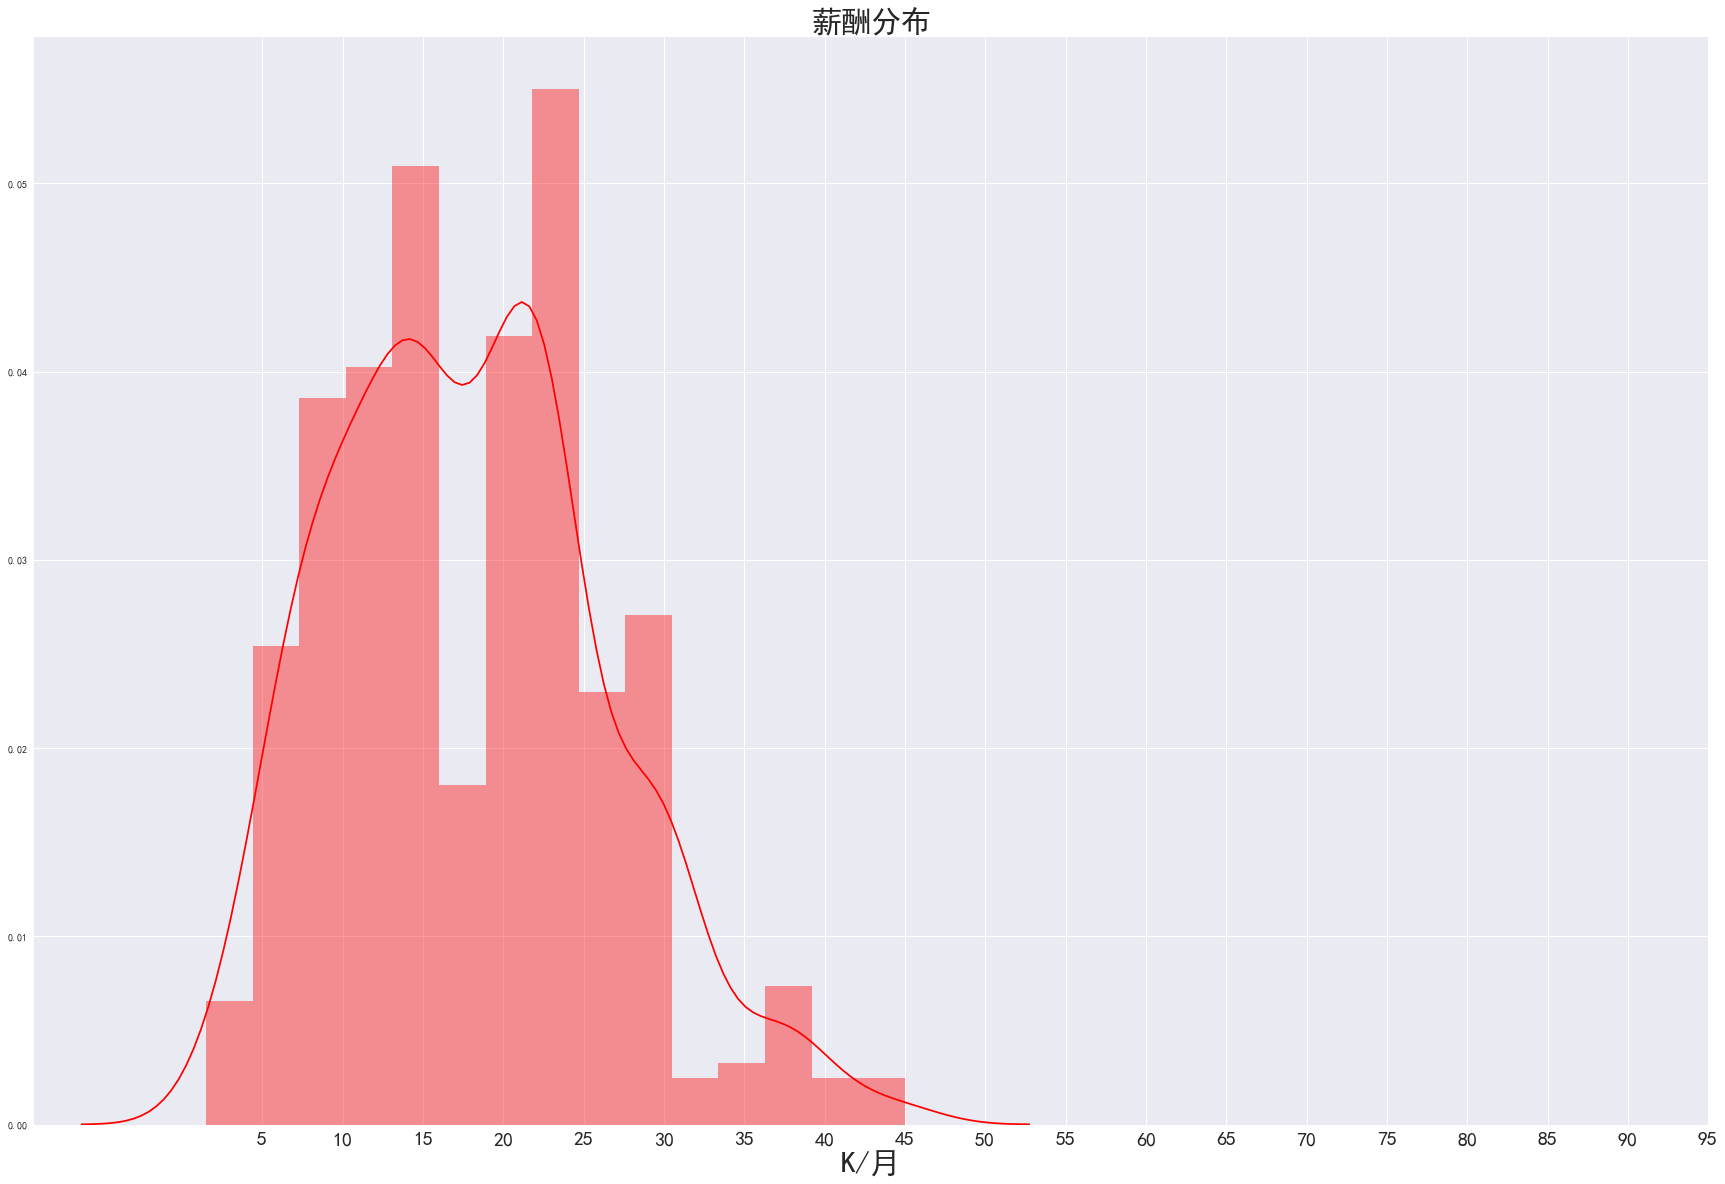

In [42]:
def avg_salary(salary):
    #该函数传入一个薪酬区间字符串，并将其转换成区间均值并返回
    try:
        s_list = salary.split('-')
        s_min = int(s_list[0][:-1])
        s_max = int(s_list[1][:-1])
        s_avg = float(s_min + s_max)/2
    #如果给出的不是一个区间，则没有‘-’
    except UnicodeEncodeError:
        s_list = salary.split('k')
        s_avg = float(int(s_list[0][:-1]))
    return s_avg

data_lagou['avg_month_salary'] = data_lagou['month_salary'].apply(avg_salary)
f,ax1=plt.subplots(1,1,figsize=(30,20))
sns.distplot(data_lagou['avg_month_salary'],color='r')
ax1.set_title(u'薪酬分布',fontsize=30)
ax1.set_xlabel(u'K/月',fontsize=30)
plt.xticks(range(5,100,5),fontsize=20)
plt.show()

In [ ]:
整个薪酬水平集中在8k-30k，少数人获得更高的酬薪，但是总体来说，数据分析的整体收入还是很可观的

In [45]:
data_lagou['avg_month_salary'].head()

0    30.0
1    11.5
2    25.0
3    19.0
4    15.0
Name: avg_month_salary, dtype: float64

In [25]:
a='10k-12k'
b=a.split('-')
b_min=b[0]
b_min

'10k'

In [26]:
#取0到-1之前的数
b_min1=b_min[:-1]
b_min1

'10'

不同城市薪酬情况

In [74]:
df = pd.DataFrame({'key1':['a', 'a', 'b', 'b', 'a'], 'key2':['one', 'two', 'one', 'two', 'one'],
                     'data1':np.random.randn(5),'data2':np.random.randn(5)})
print(df)

      data1     data2 key1 key2
0  0.633433 -2.534376    a  one
1  1.248186  0.533763    a  two
2 -0.776015 -0.282759    b  one
3 -0.846992  0.171821    b  two
4 -1.955094  2.196331    a  one


In [79]:
grouped = df.groupby(df['key1'])
grouped

In [80]:
for i in grouped:
    print (i)

('a',       data1     data2 key1 key2
0  0.633433 -2.534376    a  one
1  1.248186  0.533763    a  two
4 -1.955094  2.196331    a  one)
('b',       data1     data2 key1 key2
2 -0.776015 -0.282759    b  one
3 -0.846992  0.171821    b  two)


In [81]:
grouped1=df.groupby(df['key1'])['data1']
for i in grouped1:
    print(i)

('a', 0    0.633433
1    1.248186
4   -1.955094
Name: data1, dtype: float64)
('b', 2   -0.776015
3   -0.846992
Name: data1, dtype: float64)


In [82]:
print(grouped.get_group('a'))

      data1     data2 key1 key2
0  0.633433 -2.534376    a  one
1  1.248186  0.533763    a  two
4 -1.955094  2.196331    a  one


In [83]:
print(grouped.get_group('a').values)

[[0.6334333258209446 -2.5343759865468187 'a' 'one']
 [1.248185834324059 0.5337633575618784 'a' 'two']
 [-1.95509365862719 2.196330601143808 'a' 'one']]


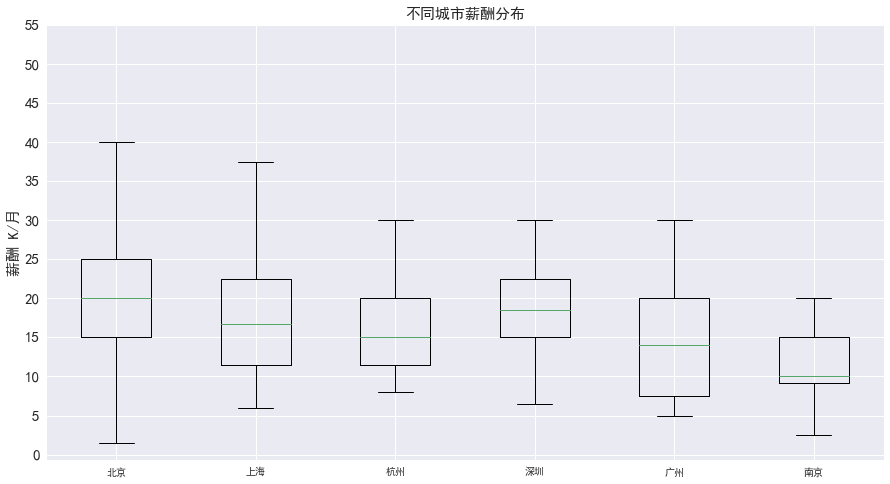

In [164]:
#观察分城市的薪酬分布箱线图
count_by_city_salary = data_lagou.groupby(['city'])['avg_month_salary']
#取前6个城市的数据
#很多城市的数据样本太小，其箱线图并无实际意义，着重关注岗位数量前六位的城市
small_data_by_city = count_by_city[0:6]
df = []
#分别取出每个城市所对应的月薪数据
for group in small_data_by_city.index:
    v = count_by_city_salary.get_group(group).values
    df.append(v)
f,ax2=plt.subplots(1,1,figsize=(15,8))
#设置标签
ax2.boxplot(df)
#set_xticklabels,设置横坐标的标签
ax2.set_xticklabels(small_data_by_city.index)
plt.yticks(range(0,60,5),fontsize=15)
    
ax2.set_title(u'不同城市薪酬分布',fontsize=15)
ax2.set_ylabel(u'薪酬 K/月',fontsize=15)
plt.show()

忽略掉那些人才需求量比较小的城市，我重点关注排名前六的城市。从图上看，这六大城市的薪酬分布情况总体来说都比较集中，这和我们前面看到的全国的薪酬总体情况分布是一致的。被禁薪酬分布中位数大约在20k,居全国首位。其次是深圳，约18k，之后是上海和杭州。

工作经验需求：

In [154]:
#观察工作经验分布
for i in range(len(data_lagou['experience'])):
    if data_lagou['experience'].iloc[i] in [u'不限',u'应届毕业生']:
        data_lagou['experience'].iloc[i] = u'1年以下'
count_by_experience=data_lagou.groupby(['experience']).size()
count_by_experience

experience
1-3年     152
1年以下      49
3-5年     189
5-10年     30
dtype: int64

In [156]:
#分组后，经验这一列数值变成了index,为了后续排序方便，另建一个数据框将其转为values
value_by_exp = pd.DataFrame([count_by_experience.index,count_by_experience.values]).T
value_by_exp.columns = ['exp','count']
sort_by_exp = value_by_exp.copy()
sort_by_exp

,exp,count
0,1-3年,152
1,1年以下,49
2,3-5年,189
3,5-10年,30


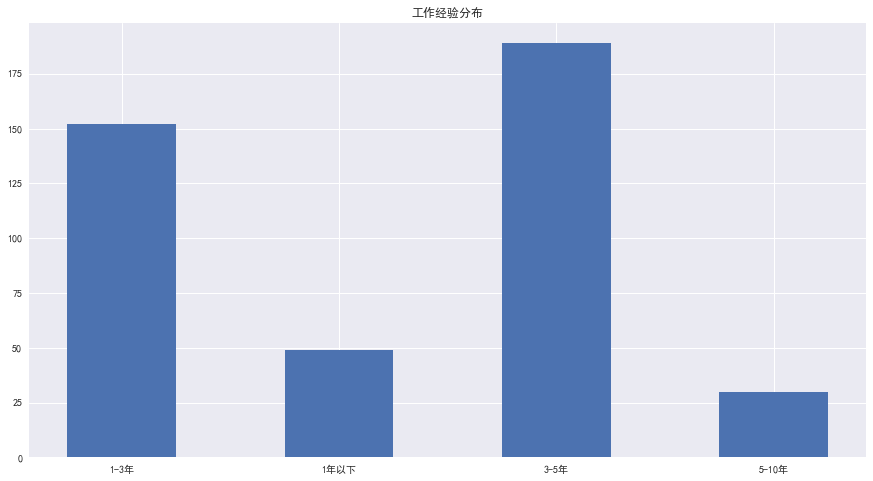

In [157]:
f,ax3=plt.subplots(1,1,figsize=(15,8))
plt.bar(range(len(sort_by_exp)),sort_by_exp['count'],width=0.5)
ax3.set_title(u'工作经验分布')
#设置4个刻度
ax3.set_xticks(range(len(sort_by_exp)))
ax3.set_xticklabels(sort_by_exp['exp'])
plt.show()

工作3-5年经验的熟手需求量最大，其次是1-3年工作经验的。工作经验不足1年的新人，市场
需求量比较少。另外，工作经验要5-10年的需求量非常稀少，而10年以上的更是凤毛麟角。

不同工作经验的酬薪分布

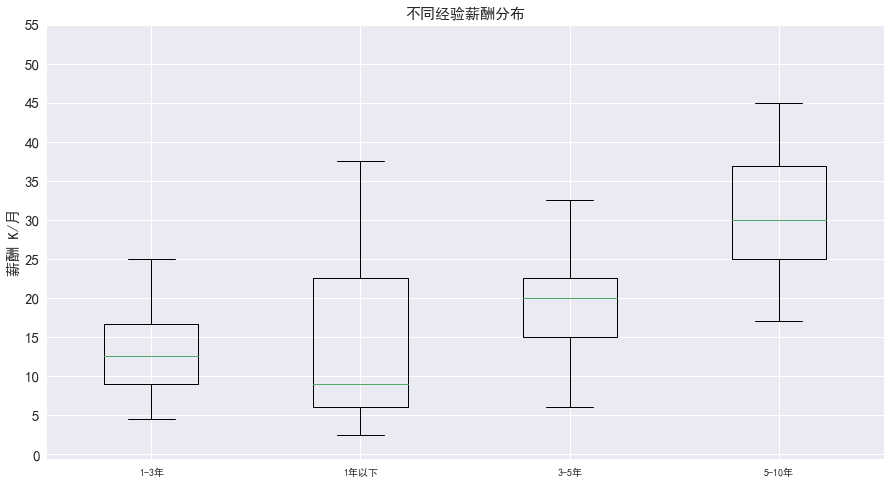

In [148]:
#观察不同经验要求的薪酬分布,和不同城市的薪酬情况类似
group_by_exp = data_lagou.groupby(['experience'])['avg_month_salary']
df = []
for group in sort_by_exp['exp']:
    v = group_by_exp.get_group(group).values
    df.append(v)
f,ax4=plt.subplots(1,1,figsize=(15,8))
ax4.boxplot(df)
#set_xticklabels,设置横坐标的标签
ax4.set_xticklabels(sort_by_exp['exp'])
plt.yticks(range(0,60,5),fontsize=15)
ax4.set_title(u'不同经验薪酬分布',fontsize=15)
ax4.set_ylabel(u'薪酬 K/月',fontsize=15)
plt.show()

毫无疑问的，随着经验的提升，数据分析师的薪酬也在不断提高。另外，从现有数据来看，数据分析师在10年内大概不会因为年龄的增长导致收入下降。

学历对薪酬的影响

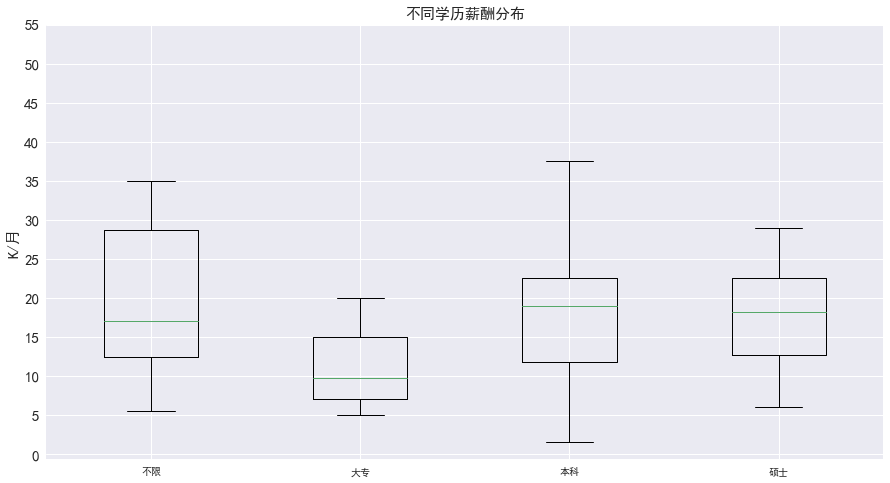

In [166]:
#观察不同学历的薪酬分布箱线图
count_by_qua=data_lagou.groupby(['qualification']).size()
count_by_qua_salary = data_lagou.groupby(['qualification'])['avg_month_salary']
df = []
#分别取出每个学历所对应的月薪数据
for group in count_by_qua.index:
    v = count_by_qua_salary.get_group(group).values
    df.append(v)
f,ax4=plt.subplots(1,1,figsize=(15,8))
#设置标签
ax4.boxplot(df)
#set_xticklabels,设置横坐标的标签
ax4.set_xticklabels(count_by_qua.index)
plt.yticks(range(0,60,5),fontsize=15)
    
ax4.set_title(u'不同学历薪酬分布',fontsize=15)
ax4.set_ylabel(u'K/月',fontsize=15)
plt.show()

In [167]:
count_by_qua

qualification
不限     19
大专     24
本科    359
硕士     18
dtype: int64

不同学历需求量

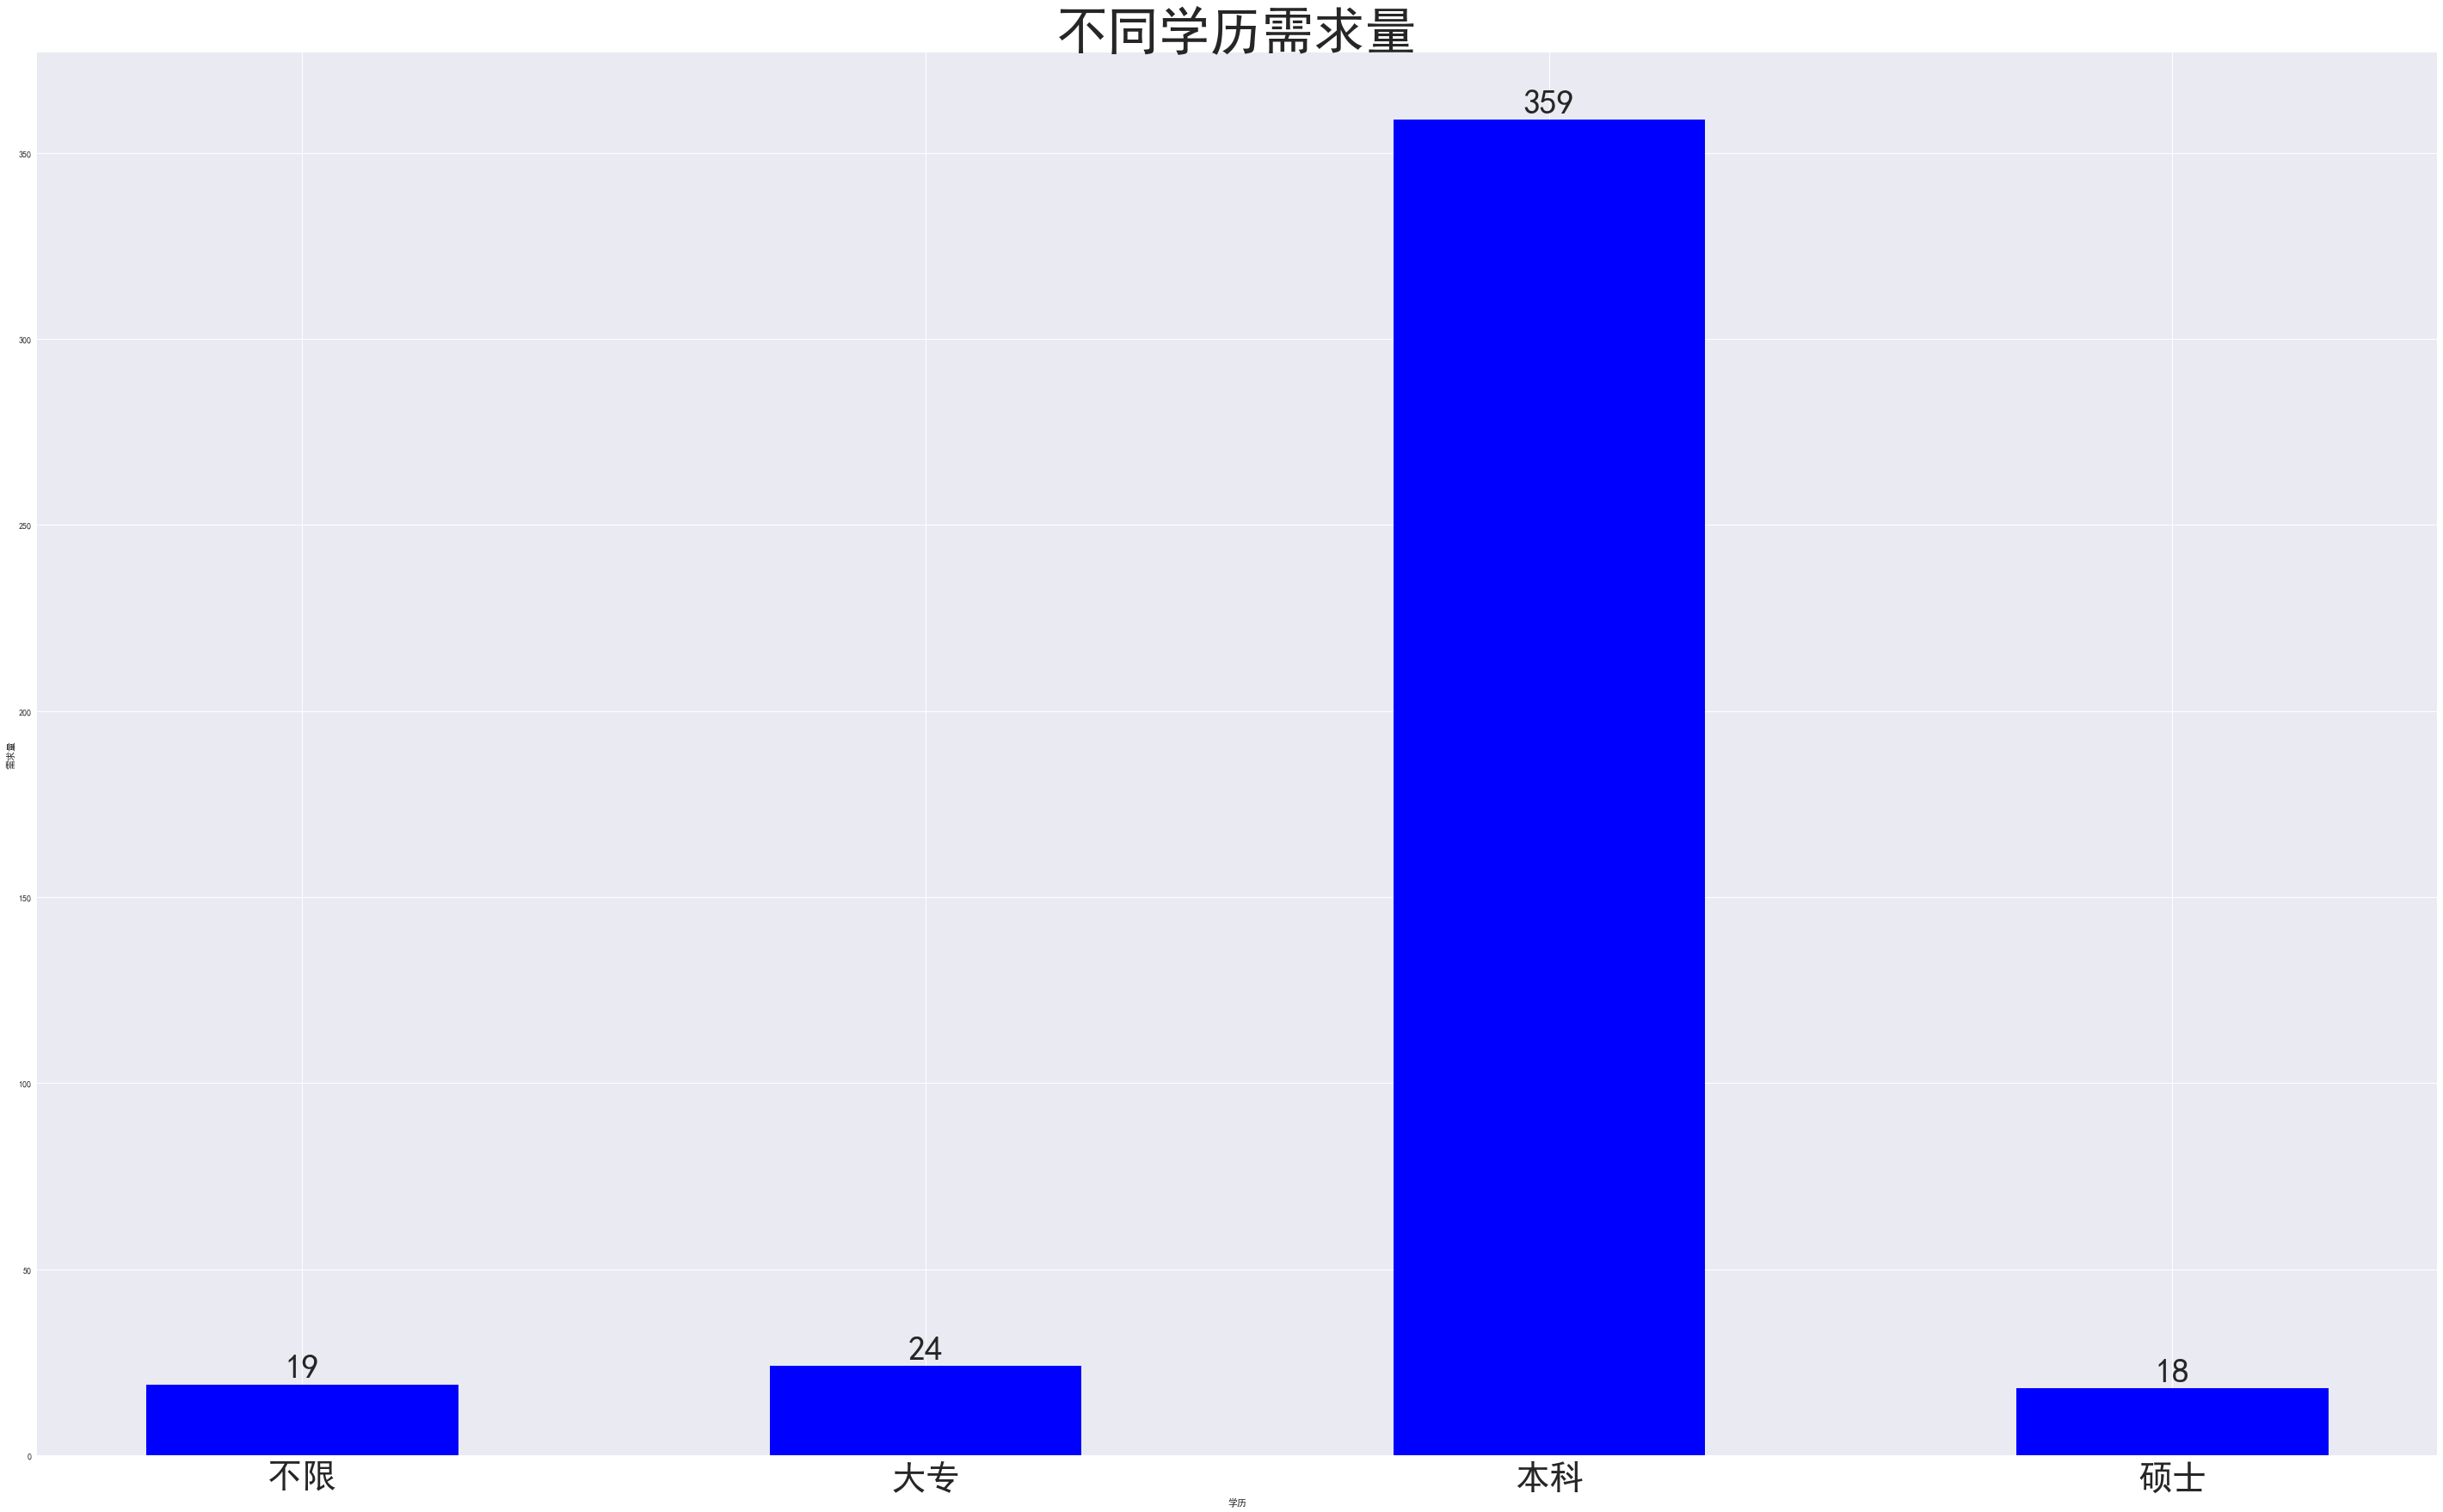

In [172]:
labels=count_by_qua.index
value=count_by_qua.values
plt.figure(figsize=(50,30))
plt.bar(range(len(count_by_qua)),value,color='b',width=0.5)
for a,b in zip(range(len(count_by_qua)),value):
    plt.text(a,b+0.5,'%.0f'%b,ha='center',va='bottom',fontsize=40)
plt.xlabel(u'学历')
plt.ylabel(u'需求量')
plt.title(u'不同学历需求量',fontsize=60)
plt.xticks(range(len(count_by_qua)),labels,fontsize=40)
plt.show()

从以上的两个分析可以看出，本科学历的需求量最大，几乎占到了90%，本科和硕士学历薪资水平的中位数相差不大

# 结论

通过上面的分析，可以的得到的结论如下：
- 数据分析这一岗位，有大量的工作机会集中在北上广深以及杭州。
- 大多数据分析师的收入集中在8k-30k每月，只有少数人能够获得更高的薪酬，但有极少数人薪
酬极高，让人充满期待。
- 从待遇上看，数据分析师留在深圳发展是个不错的选择，其次是北京、上海。
- 数据分析是个年轻的职业方向，大量的工作经验需求集中在3-5年。
- 对于数据分析师来说，5年似乎是个瓶颈期，如果在5年之内没有转型或者质的提升，大概以后
的竞争压力会比较大。
- 随着经验的提升，数据分析师的薪酬也在不断提高，10年以上工作经验的人，能获得相当丰厚
的薪酬。